# Models to predict the Survival of sepsis patients

In [9]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import datetime
from time import time
import import_ipynb
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
#import visuals as vs


## Extracting the clean data  

In [10]:
import os
os.getcwd()
os.chdir(r'C:\Users\skura\Desktop\HAP\Project')
labevents = pd.read_csv(r'clean_sepsis_feature_list.csv')

sepsis_features = pd.read_csv('clean_sepsis_feature_list.csv')

In [11]:
sepsis_features.columns

Index(['Unnamed: 0', 'subject_id', 'hadm_id', 'Alanine Aminotransferase (ALT)',
       'Alkaline Phosphatase', 'Anion Gap', 'Asparate Aminotransferase (AST)',
       'Basophils', 'Bicarbonate', 'Bilirubin, Total', 'Calcium, Total',
       'Chloride', 'Creatinine', 'Eosinophils', 'Glucose', 'Hematocrit',
       'Hemoglobin', 'INR(PT)', 'Lactate', 'Lymphocytes', 'MCH', 'MCHC', 'MCV',
       'Magnesium', 'Monocytes', 'Neutrophils', 'PT', 'PTT', 'Phosphate',
       'Platelet Count', 'Potassium', 'RDW', 'Red Blood Cells', 'Sodium',
       'Specific Gravity', 'Urea Nitrogen', 'White Blood Cells', 'pH',
       'admission_type', 'insurance', 'ethnicity', 'death_period', 'gender',
       'age', 'BLOOD CULTURE', 'MRSA SCREEN', 'SPUTUM', 'STOOL', 'SWAB',
       'URINE', 'num_of_infections'],
      dtype='object')

In [12]:
sepsis_features.drop(['Unnamed: 0'],axis=1,inplace=True)

In [13]:
sepsis_features.head()

,subject_id,hadm_id,Alanine Aminotransferase (ALT),Alkaline Phosphatase,Anion Gap,Asparate Aminotransferase (AST),Basophils,Bicarbonate,"Bilirubin, Total","Calcium, Total",...,death_period,gender,age,BLOOD CULTURE,MRSA SCREEN,SPUTUM,STOOL,SWAB,URINE,num_of_infections
0,21,111970,47.000000,167.000000,17.0,82.000000,0.00,23.50,0.300000,7.700000,...,1,M,87,1,0,0,1,0,0,2
1,94,183686,90.333333,68.666667,14.0,82.333333,0.85,23.25,1.033333,8.075000,...,0,M,74,0,0,0,0,0,0,0
2,157,107880,13.000000,118.000000,17.4,25.000000,0.00,18.00,0.600000,7.940000,...,0,M,80,0,0,0,0,0,2,3
3,166,128219,94.822544,141.192150,19.0,148.710368,0.00,24.00,1.501629,7.903004,...,1,F,91,1,0,0,0,0,0,1
4,188,191517,121.000000,130.000000,15.0,114.000000,0.00,17.00,1.775000,7.725000,...,0,M,51,0,0,0,0,0,0,0


In [14]:
sepsis_features.num_of_infections.describe()

count    1178.000000
mean        1.224109
std         1.553037
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max        14.000000
Name: num_of_infections, dtype: float64

In [15]:
sepsis_features.select_dtypes(exclude=['floating','integer']).head()
sepsis_features = pd.get_dummies(sepsis_features)

### Analyzing the co-relation and importance of all features together

### Shuffle and Split Data

Now all categorical variables have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 90% of the data will be used for training and 10% for testing. We are doing 90% and 10% because our dataset is small.

In [16]:
# Import train_test_split
from sklearn.model_selection import train_test_split


tr, ts = train_test_split(sepsis_features, test_size=0.2)

In [17]:
cls = list(sepsis_features.columns)
cls.remove('subject_id')
cls.remove('hadm_id')
cls.remove('death_period')

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score


**Models**

In [67]:
lr = LogisticRegression(solver='lbfgs', C=0.9, max_iter=1000)
lr.fit(tr[cls],tr['death_period'])
probs = lr.predict_proba(ts[cls])[:,1]
fpr,tpr,thresholds = roc_curve(ts['death_period'],probs)
auc(fpr,tpr)

0.7963837267704671

In [68]:
rf = RandomForestClassifier(n_estimators=200, n_jobs=-1)
rf.fit(tr[cls],tr['death_period'])
probs = rf.predict_proba(ts[cls])[:,1]
fpr,tpr,thresholds = roc_curve(ts['death_period'],probs)
auc(fpr,tpr)

0.8015570065293821

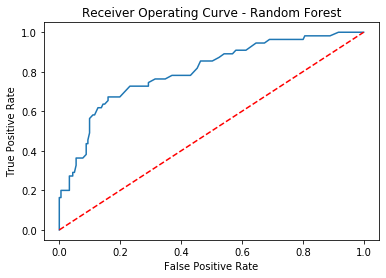

In [69]:

plt.figure()
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Curve - Random Forest')
plt.show()

In [70]:
rf.feature_importances_

array([2.08030371e-02, 1.88452885e-02, 4.60555762e-02, 2.43373736e-02,
       1.46526806e-02, 4.60953812e-02, 3.11518471e-02, 3.45012599e-02,
       2.13110395e-02, 2.32448284e-02, 1.19945510e-02, 2.12375059e-02,
       2.42801818e-02, 2.17806647e-02, 2.68291016e-02, 6.51761284e-02,
       1.99892144e-02, 2.34792725e-02, 3.19061395e-02, 2.21943606e-02,
       2.18201206e-02, 1.94206582e-02, 2.29644845e-02, 2.57731611e-02,
       3.33922434e-02, 4.84881885e-02, 2.19204024e-02, 2.40850502e-02,
       2.72003073e-02, 1.87972141e-02, 2.40381197e-02, 1.42078565e-02,
       3.35892719e-02, 2.46245323e-02, 9.92698211e-03, 2.52584723e-02,
       3.49938708e-03, 8.32609700e-04, 7.01274362e-03, 1.35241735e-03,
       2.41287498e-03, 4.10095276e-03, 8.34349045e-03, 6.85537475e-04,
       7.95667304e-04, 3.61730033e-04, 1.49728401e-03, 2.13362677e-03,
       2.56541535e-03, 1.50544785e-04, 9.83071996e-04, 0.00000000e+00,
       1.51967038e-04, 2.36376613e-03, 0.00000000e+00, 2.67936378e-05,
      

In [71]:
fea= sepsis_features.columns.tolist()
fea.remove('death_period')
#fea

In [51]:
res = pd.DataFrame()
res['columns'] = sepsis_features[cls].columns.tolist()
res['vals'] = rf.feature_importances_

In [64]:
res = res.sort_values('vals',ascending = False)
#res.head(20)


,columns,vals
15,Lactate,0.064957
25,Phosphate,0.051210
2,Anion Gap,0.046036
5,Bicarbonate,0.045319
32,Urea Nitrogen,0.033788
24,PTT,0.033636
7,"Calcium, Total",0.032189
6,"Bilirubin, Total",0.031876
18,MCHC,0.031325
28,RDW,0.028481


No handles with labels found to put in legend.


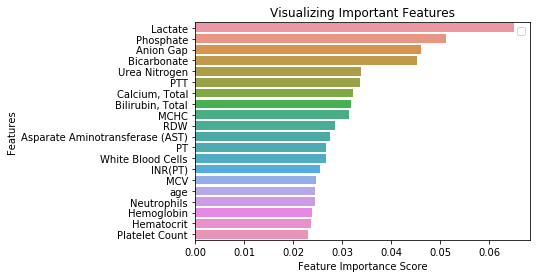

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x="vals", y= "columns", data = res[:20])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [27]:
import warnings
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

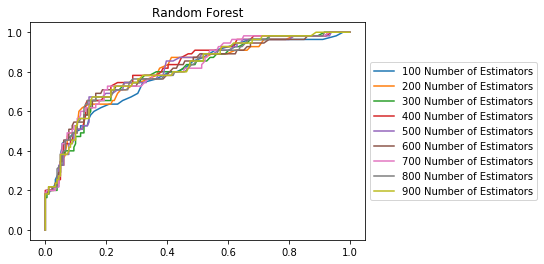

In [28]:

#Finding the ROC on increasing the variables according to their importance. Considering number of trees as 100
import sklearn.metrics as metrics
rf = dict()
probs_rf = dict()
fpr_rf = dict()
tpr_rf = dict()
thresholds_rf = dict()
auc_rf = dict()
Auc =[]
Number_of_Estimators =[]
for n in range(100, 1000, 100):
    rf[n]=RandomForestClassifier(n_estimators =n)
    rf[n].fit(tr[cls],tr['death_period'])
    probs_rf[n]=rf[n].predict_proba(ts[cls])[:,1]
    fpr_rf[n],tpr_rf[n],thresholds_rf[n] = metrics.roc_curve(ts['death_period'],probs_rf[n])
    auc_rf[n]=auc(fpr_rf[n],tpr_rf[n])
    Auc.append(auc_rf[n])
    Number_of_Estimators.append(n)
    plt.title('Random Forest')
    plt.plot(fpr_rf[n], tpr_rf[n],label = "{} Number of Estimators".format(n))
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

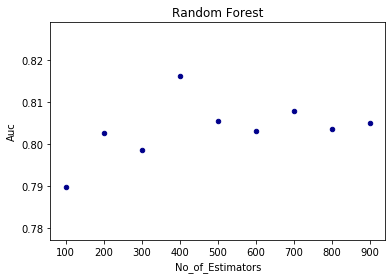

In [29]:
aucperf= pd.DataFrame({'No_of_Estimators':Number_of_Estimators,'Auc':Auc})
aucperf.plot.scatter(x='No_of_Estimators',y='Auc',c='DarkBlue',title = 'Random Forest')

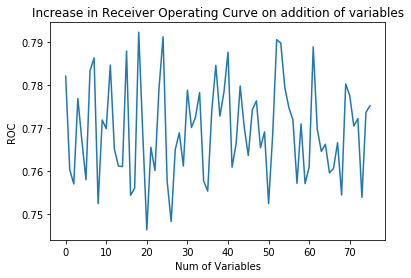

In [108]:
plt.figure()
plt.plot(list(range(len(r1))),r1)
plt.xlabel('Num of Variables')
plt.ylabel('ROC')
plt.title('Increase in Receiver Operating Curve on addition of variables')
plt.show()

In [110]:
tr_results = []
ts_results = []
for i in range(10,200,10):
    rf = RandomForestClassifier(n_estimators = i,n_jobs = -1)
    rf.fit(tr[cls],tr['death_period'])
    train_pred = rf.predict(tr[cls])
    fpr,tpr,thresholds = roc_curve(tr['death_period'],train_pred)
    roc_auc = auc(fpr,tpr)
    tr_results.append(roc_auc)
#ROC for test set on changing number of trees    
    Y_proba = rf.predict_proba(ts[cls])[:,1]
    fpr,tpr,thresholds = roc_curve(ts['death_period'],Y_proba)
    roc_auc = auc(fpr,tpr)
    ts_results.append(roc_auc)

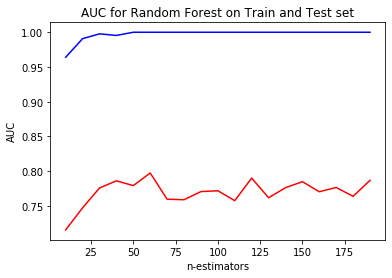

In [113]:

line1 = plt.plot(list(range(10,200,10)),tr_results,'b',label = "Train AUC")
line2 = plt.plot(list(range(10,200,10)),ts_results,'r',label = "Test AUC")
plt.xlabel('n-estimators')
plt.ylabel('AUC')
plt.title('AUC for Random Forest on Train and Test set')
plt.show()

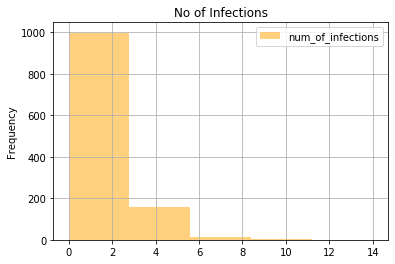

In [139]:
ax = sepsis_features[['num_of_infections']].plot(kind='hist', title ="No of Infections", legend=True, grid=True, bins=5, color='orange', alpha=0.5)

In [80]:
#GridSearch cross validation for logistic regresssion
from sklearn.model_selection import GridSearchCV
log_reg = LogisticRegression(solver="liblinear",max_iter=200)
grid = {"penalty" : ["l1","l2"], "C" : np.arange(10,100,5)}
log_reg_cv = GridSearchCV(log_reg, grid, cv = 5)
log_reg_cv.fit(tr[cls],tr['death_period'])
print("Tuned hyperparameter: {}".format(log_reg_cv.best_params_))
print("Best score: {}".format(log_reg_cv.best_score_))

Tuned hyperparameter: {'C': 10, 'penalty': 'l1'}
Best score: 0.8152866242038217


In [81]:
logreg_best = LogisticRegression(C = 10, penalty = "l1",solver = "liblinear")
logreg_best.fit(tr[cls],tr['death_period'])



LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [82]:
probs = logreg_best.predict_proba(ts[cls])[:,1]

0.7447222222222223


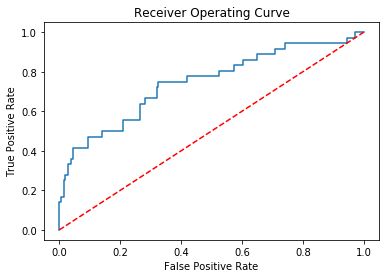

In [83]:
fpr,tpr,thresholds = roc_curve(ts['death_period'],probs)
print(auc(fpr,tpr))
plt.figure()
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Curve')
plt.show()

## Feature Selection

In [147]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2
mic = mutual_info_classif(tr[cls], tr['death_period'])
mic
s = pd.DataFrame()
s['att'] = cls
s['mic'] = mic
chi2 = chi2(tr[cls],tr['death_period'])
s['chi2'] = chi2[0]

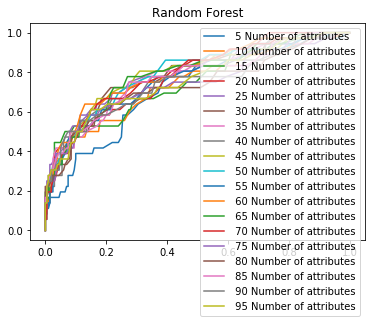

In [161]:
rf200=RandomForestClassifier(n_estimators=100)
Auc =[]
No_of_Attributes =[]
for n in range(5, 100, 5):
    cols_sel_mic=s.sort_values('mic', ascending=False)['att'][:n]
    rf200.fit(tr[cols_sel_mic],tr['death_period'])
    probs_rf200=rf200.predict_proba(ts[cols_sel_mic])
    fpr_rf200, tpr_rf200, thresholds_rf200 = roc_curve(ts['death_period'],probs_rf200[:,1])
    auc_rf200=auc(fpr_rf200,tpr_rf200)
    Auc.append(auc_rf200)
    No_of_Attributes.append(n)
    plt.title('Random Forest')
    plt.plot(fpr_rf200, tpr_rf200,label =" {} Number of attributes".format(n))
    plt.legend(loc='Right')

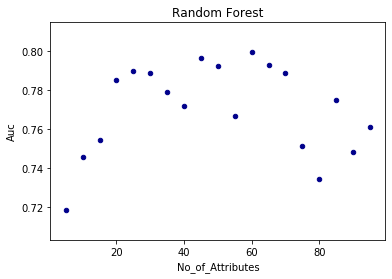

In [162]:
aucperf= pd.DataFrame({'No_of_Attributes':No_of_Attributes,'Auc':Auc})
aucperf.plot.scatter(x='No_of_Attributes',y='Auc',c='DarkBlue',title = 'Random Forest')

### Oversampling  the minority class 


**Model1: Random Forest**

In [73]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from collections import Counter

os =  RandomOverSampler(sampling_strategy='auto')
X_train_res, y_train_res = os.fit_sample(tr[cls], tr['death_period'])

print ("Distribution of class labels before resampling {}".format(Counter(tr['death_period'])))
print ("Distribution of class labels after resampling {}".format(Counter(y_train_res)))

Distribution of class labels before resampling Counter({0: 745, 1: 197})
Distribution of class labels after resampling Counter({0: 745, 1: 745})


## Logistic Regression  With Tuning

In [136]:
#Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score,accuracy_score,make_scorer

#Initialize the classifier
clf = LogisticRegression(solver="liblinear",max_iter=200)

# Create the parameters list you wish to tune
# Multiple parameters were used for optimization. All the parameters that were used for optimization are listed here.
parameters = {"penalty" : ["l1","l2"], "C" : np.arange(10,100,5)}

# Make an fbeta_score scoring object
scorer = make_scorer(fbeta_score, beta=0.5)

# Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(clf, param_grid=parameters,scoring=scorer,n_jobs=8, cv =5)

# Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train_res, y_train_res)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train_res, y_train_res)).predict(ts[cls])
best_predictions = best_clf.predict(ts[cls])

In [ ]:
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_res, y_train_preds)
fpr_test, tpr_test, thresholds_tets = roc_curve(ts['death_period'], y_test_preds)


thresh = 0.20

auc_train = roc_auc_score(y_train_res, y_train_preds)
auc_test = roc_auc_score(ts['death_period'], y_test_preds)


print('Test AUC:%.3f'%auc_test)


print('Test accuracy:%.3f'%calc_accuracy(ts['death_period'], y_test_preds,thresh))


print('Test recall:%.3f'%calc_recall(ts['death_period'], y_test_preds,thresh))

print('Test precision:%.3f'%calc_precision(ts['death_period'], y_test_preds,thresh))


print('Test specificity:%.3f'%calc_specificity(ts['death_period'], y_test_preds,thresh))





plt.plot(fpr_train, tpr_train,'r-', label = 'Train AUC: %.2f'%auc_train)
plt.plot(fpr_test, tpr_test,'b-',label = 'Test AUC: %.2f'%auc_test)
plt.plot([0,1],[0,1],'-k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [137]:
# Report the before-and-afterscores
# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(ts['death_period'], predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(ts['death_period'], predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(ts['death_period'], predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(ts['death_period'], best_predictions, beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 0.7669
F-score on testing data: 0.5145

Optimized Model
------
Final accuracy score on the testing data: 0.7669
Final F-score on the testing data: 0.5116


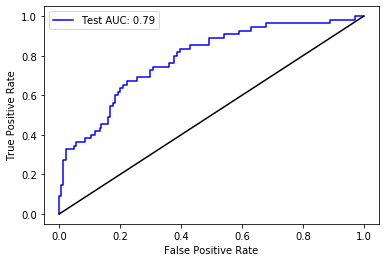

In [138]:




plt.plot(fpr_test, tpr_test,'b-',label = 'Test AUC: %.2f'%auc_test)
plt.plot([0,1],[0,1],'-k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
lr = LogisticRegression(solver='lbfgs', C=0.9, max_iter=1000)
lr.fit(X_train_res, y_train_res)


model = lr

In [103]:
rf=RandomForestClassifier(n_estimators=300)
rf.fit(X_train_res, y_train_res)

model = rf


# Logistic without Tuning

In [76]:
lr = LogisticRegression(solver='lbfgs', C=0.9, max_iter=1000)
lr.fit(X_train_res, y_train_res)


model = lr


In [104]:
y_train_preds = model.predict_proba(X_train_res)[:,1]
y_test_preds = model.predict_proba(ts[cls])[:,1]

In [105]:
def calc_accuracy(y_actual, y_pred, thresh):
    # this function calculates the accuracy with probability threshold at thresh
    return (sum((y_pred > thresh) & (y_actual == 1))+sum((y_pred < thresh) & (y_actual == 0))) /len(y_actual)

def calc_recall(y_actual, y_pred, thresh):
    # calculates the recall
    return sum((y_pred > thresh) & (y_actual == 1)) /sum(y_actual)

def calc_precision(y_actual, y_pred, thresh):
    # calculates the precision
    return sum((y_pred > thresh) & (y_actual == 1)) /sum(y_pred > thresh)

def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def calc_prevalence(y_actual):
    # calculates prevalence
    return sum((y_actual == 1)) /len(y_actual)

Train AUC:1.000
Test AUC:0.786
Train accuracy:0.985
Test accuracy:0.754
Train recall:1.000
Test recall:0.636
Train precision:0.974
Test precision:0.479
Train specificity:0.969
Test specificity:0.790
Train prevalence:0.500
Test prevalence:0.233


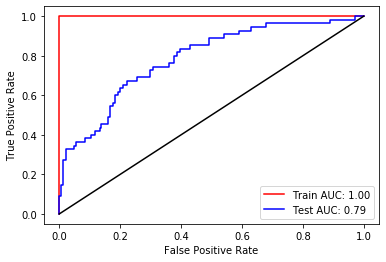

In [142]:
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_res, y_train_preds)
fpr_test, tpr_test, thresholds_tets = roc_curve(ts['death_period'], y_test_preds)


thresh = 0.20

auc_train = roc_auc_score(y_train_res, y_train_preds)
auc_test = roc_auc_score(ts['death_period'], y_test_preds)

print('Train AUC:%.3f'%auc_train)
print('Test AUC:%.3f'%auc_test)

print('Train accuracy:%.3f'%calc_accuracy(y_train_res, y_train_preds,thresh))
print('Test accuracy:%.3f'%calc_accuracy(ts['death_period'], y_test_preds,thresh))


print('Train recall:%.3f'%calc_recall(y_train_res, y_train_preds,thresh))
print('Test recall:%.3f'%calc_recall(ts['death_period'], y_test_preds,thresh))

print('Train precision:%.3f'%calc_precision(y_train_res, y_train_preds,thresh))
print('Test precision:%.3f'%calc_precision(ts['death_period'], y_test_preds,thresh))

print('Train specificity:%.3f'%calc_specificity(y_train_res, y_train_preds, thresh))
print('Test specificity:%.3f'%calc_specificity(ts['death_period'], y_test_preds,thresh))

print('Train prevalence:%.3f'%calc_prevalence(y_train_res))
print('Test prevalence:%.3f'%calc_prevalence(ts['death_period']))


plt.plot(fpr_train, tpr_train,'r-', label = 'Train AUC: %.2f'%auc_train)
plt.plot(fpr_test, tpr_test,'b-',label = 'Test AUC: %.2f'%auc_test)
plt.plot([0,1],[0,1],'-k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


## Gradient boosting Classifier Without Tuning

In [87]:
from sklearn.ensemble import GradientBoostingClassifier
my_random_state=42
gdb= GradientBoostingClassifier(random_state=my_random_state)
my_random_state=42
gdb.fit(X_train_res, y_train_res)
model = gdb


In [88]:
y_train_preds = model.predict_proba(X_train_res)[:,1]
y_test_preds = model.predict_proba(ts[cls])[:,1]

Train AUC:1.000
Test AUC:0.786
Train accuracy:0.985
Test accuracy:0.754
Train recall:1.000
Test recall:0.636
Train precision:0.974
Test precision:0.479
Train specificity:0.969
Test specificity:0.790
Train prevalence:0.500
Test prevalence:0.233


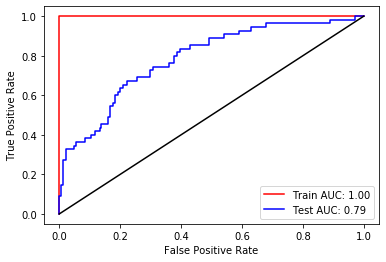

In [141]:
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_res, y_train_preds)
fpr_test, tpr_test, thresholds_tets = roc_curve(ts['death_period'], y_test_preds)


thresh = 0.20

auc_train = roc_auc_score(y_train_res, y_train_preds)
auc_test = roc_auc_score(ts['death_period'], y_test_preds)

print('Train AUC:%.3f'%auc_train)
print('Test AUC:%.3f'%auc_test)

print('Train accuracy:%.3f'%calc_accuracy(y_train_res, y_train_preds,thresh))
print('Test accuracy:%.3f'%calc_accuracy(ts['death_period'], y_test_preds,thresh))


print('Train recall:%.3f'%calc_recall(y_train_res, y_train_preds,thresh))
print('Test recall:%.3f'%calc_recall(ts['death_period'], y_test_preds,thresh))

print('Train precision:%.3f'%calc_precision(y_train_res, y_train_preds,thresh))
print('Test precision:%.3f'%calc_precision(ts['death_period'], y_test_preds,thresh))

print('Train specificity:%.3f'%calc_specificity(y_train_res, y_train_preds, thresh))
print('Test specificity:%.3f'%calc_specificity(ts['death_period'], y_test_preds,thresh))

print('Train prevalence:%.3f'%calc_prevalence(y_train_res))
print('Test prevalence:%.3f'%calc_prevalence(ts['death_period']))


plt.plot(fpr_train, tpr_train,'r-', label = 'Train AUC: %.2f'%auc_train)
plt.plot(fpr_test, tpr_test,'b-',label = 'Test AUC: %.2f'%auc_test)
plt.plot([0,1],[0,1],'-k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [95]:
#gdb.feature_importances_
res = pd.DataFrame()
res['columns'] = sepsis_features[cls].columns.tolist()
res['vals'] = gdb.feature_importances_


In [96]:
res = res.sort_values('vals',ascending = False)

No handles with labels found to put in legend.


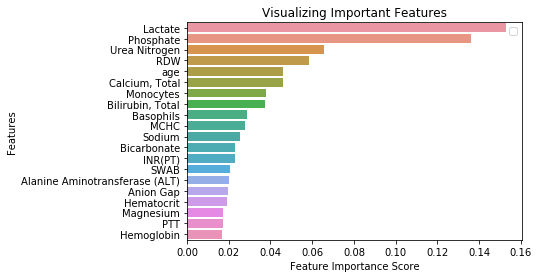

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x="vals", y= "columns", data = res[:20])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

# Gradient Boosting with Tuning

In [144]:
#Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score,accuracy_score,make_scorer

#Initialize the classifier
clf = GradientBoostingClassifier(random_state=my_random_state)

# Create the parameters list you wish to tune
# Multiple parameters were used for optimization. All the parameters that were used for optimization are listed here.
parameters = {'max_depth':[None,3,5,8,16],'min_samples_split':[2,4],'max_features':[None,5,10,15,20,30],'min_samples_leaf':[1,5,11,50],'n_estimators':[50,100],'learning_rate':[0.01,0.05,0.1] }

# Make an fbeta_score scoring object
scorer = make_scorer(fbeta_score, beta=0.5)

# Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(clf, param_grid=parameters,scoring=scorer,n_jobs=8)

# Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train_res, y_train_res)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train_res, y_train_res)).predict(ts[cls])
best_predictions = best_clf.predict(ts[cls])



In [139]:
# Report the before-and-afterscores
# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(ts['death_period'], predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(ts['death_period'], predictions, beta = 0.25)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(ts['death_period'], predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(ts['death_period'], best_predictions, beta = 0.25)))

Unoptimized model
------
Accuracy score on testing data: 0.7669
F-score on testing data: 0.5042

Optimized Model
------
Final accuracy score on the testing data: 0.7669
Final F-score on the testing data: 0.5033


In [129]:
y_test_preds = best_clf.predict_proba(ts[cls])[:,1]
thresh = 0.5
#auc_test = roc_auc_score(ts['death_period'], y_test_preds)
print('Test AUC:%.3f'%auc_test)



Test AUC:0.786


## AUC W.RT the training size of data

In [99]:
r = []
for i in range(1,1000,10):
    s = int(i/1000*len(X_train_res.index))
    print(s)
    rf = RandomForestClassifier(n_estimators = 200)
    rf.fit(X_train_res,y_train_res)
    probs = rf.predict_proba(ts[cls])[:,1]
    fpr,tpr,thresholds = roc_curve(ts['death_period'],probs)
    a=auc(fpr,tpr)
    print(a)
    r.append(a)

1
0.7983927674535409
16
0.8189352084379709
31
0.8233048719236564
46
0.79904570567554
61
0.8153691612255148
75
0.8162230035158212
90
0.8016072325464592
105
0.8075339025615269
120
0.8157207433450526
135
0.8248618784530386
150
0.823455549974887
165
0.8121546961325967
180
0.8024108488196887
195
0.8041185334003014
210
0.8028126569563034
224
0.8045203415369161
239
0.8158211953792064
254
0.7908588648920141
269
0.8082370668006027
284
0.8124058262179811
299
0.8136614766449021
314
0.8196383726770468
329
0.8164741336012055
344
0.7962330487192365
359
0.8164741336012055
373
0.8212456052235058
388
0.8079859367152186
403
0.8138121546961326
418
0.8231039678553491
433
0.8040683073832245
448
0.8114515318935208
463
0.8266197890507283
478
0.8184831742842792
493
0.8273229532898041
508
0.8282270215971874
522
0.8102461074836766
537
0.8230035158211954
552
0.8147162230035158
567
0.8167252636865897
582
0.8071823204419889
597
0.8217478653942742
612
0.8115017579105976
627
0.8122049221496735
642
0.8208940231039679

Text(0.5, 1.0, 'ROC on increasing the size of train data')

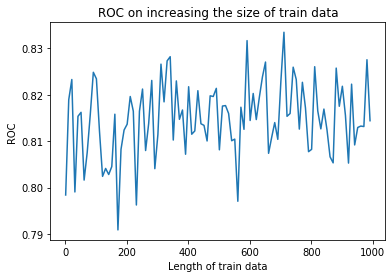

In [102]:
plt.plot(list(range(1,1000,10)),r)
plt.xlabel('Length of train data')
plt.ylabel('ROC')
plt.title('ROC on increasing the size of train data')